In [68]:
caminhos_csv = ['../data/output/output_2mm.csv',
                '../data/output/output_3mm.csv',
                '../data/output/output_correlation.csv',
                '../data/output/output_covariance.csv',
                '../data/output/output_convolution-2d.csv',
                '../data/output/output_atax.csv',
                '../data/output/output_cholesky.csv',
                '../data/output/output_doitgen.csv',
                '../data/output/output_bicg.csv',
                '../data/output/output_gemm.csv',
                '../data/output/output_syrk.csv',
                '../data/output/output_syr2k.csv',
                '../data/output/output_symm.csv',
                '../data/output/output_mvt.csv',
                '../data/output/output_durbin.csv',
                '../data/output/output_trmm.csv',
                '../data/output/output_gramscmidt.csv',
                '../data/output/output_lu.csv',
                '../data/output/output_fdtd-apml.csv',
                '../data/output/output_gemver.csv',
                '../data/output/output_gesummv.csv']
nomes_benchmarks = ['2mm', '3mm', 'Correlation', 'Covariance', 'Convolution-2d', 'Atax', 'Cholesky',
                    'Doitgen', 'BicG', 'Gemm', 'Syrk', 'Syr2k', 'Symm', 'MVT', 'Durbin', 'Trmm',
                    'Gramscmidt', 'LU', 'Fdtd-apml', 'Gemver', 'Gesummv']

In [69]:
def microjoule_to_joule(value):
  valor = 1000000
  colunas= ['CORE','CPU','DRAM','DURATION','PSYS','UNCORE']
  value[colunas] = value[colunas]/valor
  value[colunas] = round(value[colunas], 2)
  return value

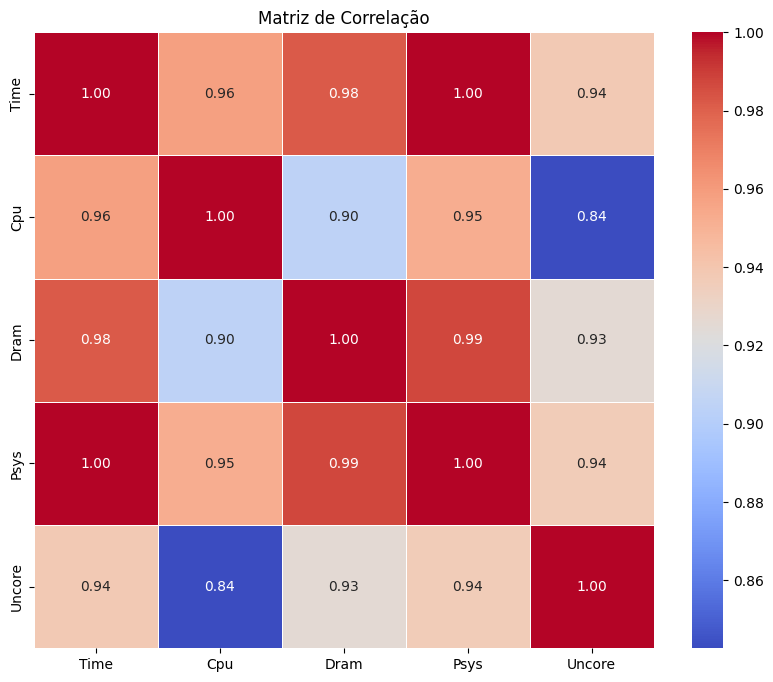

In [163]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Suponha que microjoule_to_joule seja uma função definida, e caminhos_csv e nomes_benchmarks sejam listas definidas.

# Inicializa listas para armazenar os resultados do tempo, CPU, DRAM e energia
resultados_tempo = []
resultados_CPU = []
resultados_DRAM = []
resultados_energia = []
resultados_psys= []
resultados_uncore = []

# Itera sobre os arquivos CSV
for caminho_csv, nome_benchmark in zip(caminhos_csv, nomes_benchmarks):
    df = pd.read_csv(caminho_csv, sep=';')
    df = microjoule_to_joule(df)  # Convertendo microjoules para joules
    df['ENERGY'] = df['CPU'] + df['DRAM']
    
    energy = df['ENERGY'].sum()  
    time = df['DURATION'].sum()   # Convertendo tempo para minutos
    cpu = df['CPU'].sum()
    dram =df['DRAM'].sum()
    psys= df['PSYS'].sum()
    uncore = df['UNCORE'].sum()
    
    # Armazena os resultados nas listas
    resultados_tempo.append(time)
    #resultados_energia.append(energy)
    resultados_CPU.append(cpu)
    resultados_DRAM.append(dram)
    resultados_psys.append(psys)
    resultados_uncore.append(uncore)

# Cria um DataFrame com os resultados
df_resultados = pd.DataFrame({
     'Time': resultados_tempo,
    #'Energy': resultados_energia,
    'Cpu':  resultados_CPU,
    'Dram':resultados_DRAM,
    'Psys':resultados_psys,
    'Uncore' :resultados_uncore
}, index=nomes_benchmarks)

# Calcula a matriz de correlação
correlation_matrix = df_resultados.corr()

# Plota a matriz de correlação
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

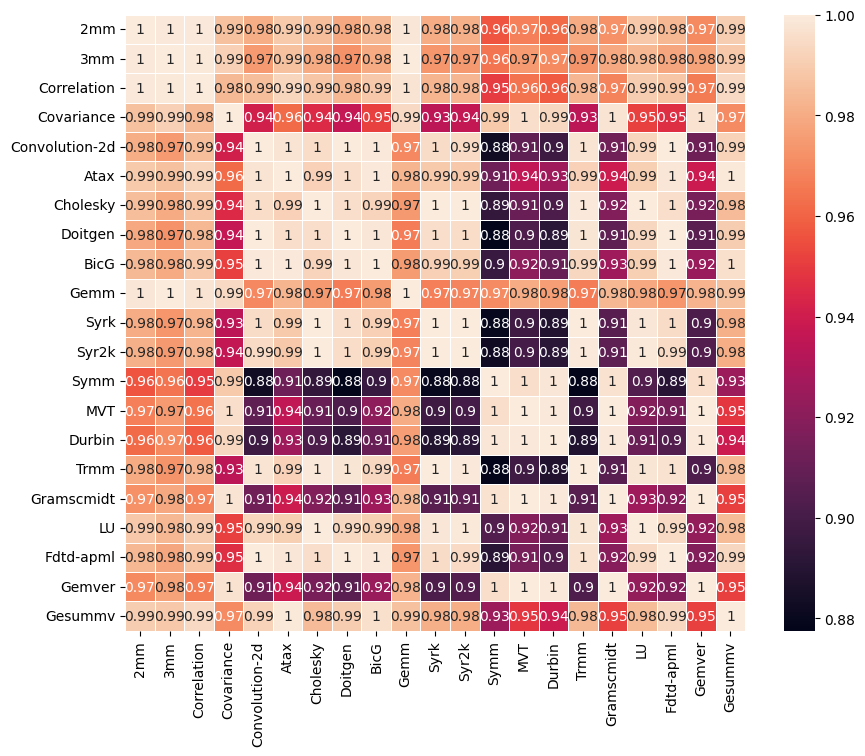

In [165]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Suponha que microjoule_to_joule seja uma função definida, e caminhos_csv e nomes_benchmarks sejam listas definidas.

# Inicializa listas para armazenar os resultados do tempo e energia
resultados_tempo = []
resultados_CPU = []
resultados_DRAM = []
resultados_energia = []
resultados_psys= []
resultados_uncore = []


# Itera sobre os arquivos CSV
for caminho_csv, nome_benchmark in zip(caminhos_csv, nomes_benchmarks):
    df = pd.read_csv(caminho_csv, sep=';')
    df = microjoule_to_joule(df)
    #print(df.head)
    df['ENERGY'] = df['CPU'] + df['DRAM']
    
    energy = df['ENERGY'].sum()  
    time = df['DURATION'].sum()   # Convertendo tempo para minutos
    cpu = df['CPU'].sum()
    dram =df['DRAM'].sum()
    psys= df['PSYS'].sum()
    uncore = df['UNCORE'].sum()
    
    # Armazena os resultados nas listas
    resultados_tempo.append(time)
    #resultados_energia.append(energy)
    resultados_CPU.append(cpu)
    resultados_DRAM.append(dram)
    resultados_psys.append(psys)
    resultados_uncore.append(uncore)

# Cria um DataFrame com os resultados
df_resultados = pd.DataFrame({
    'Time': resultados_tempo,
    #'Energy': resultados_energia,
    'Cpu':  resultados_CPU,
    'Dram':resultados_DRAM,
    'Psys':resultados_psys,
    'Uncore' :resultados_uncore
}, index=nomes_benchmarks)  # Os benchmarks são usados como índice

# Transpõe o DataFrame para ter benchmarks como colunas e 'Time' e 'Energy' como linhas
df_resultados = df_resultados.T

# Exibe o DataFrame
#print(df_resultados)

# Verifica se há mais de uma linha para calcular a correlação
if df_resultados.shape[0] > 1:
    correlation = df_resultados.corr()
    # Plota a matriz de correlação
    plt.figure(figsize=(10, 8))
    sn.heatmap(correlation, annot=True,  linewidths=.6)
    plt.show()
else:
    print("Não há dados suficientes para calcular a correlação.")

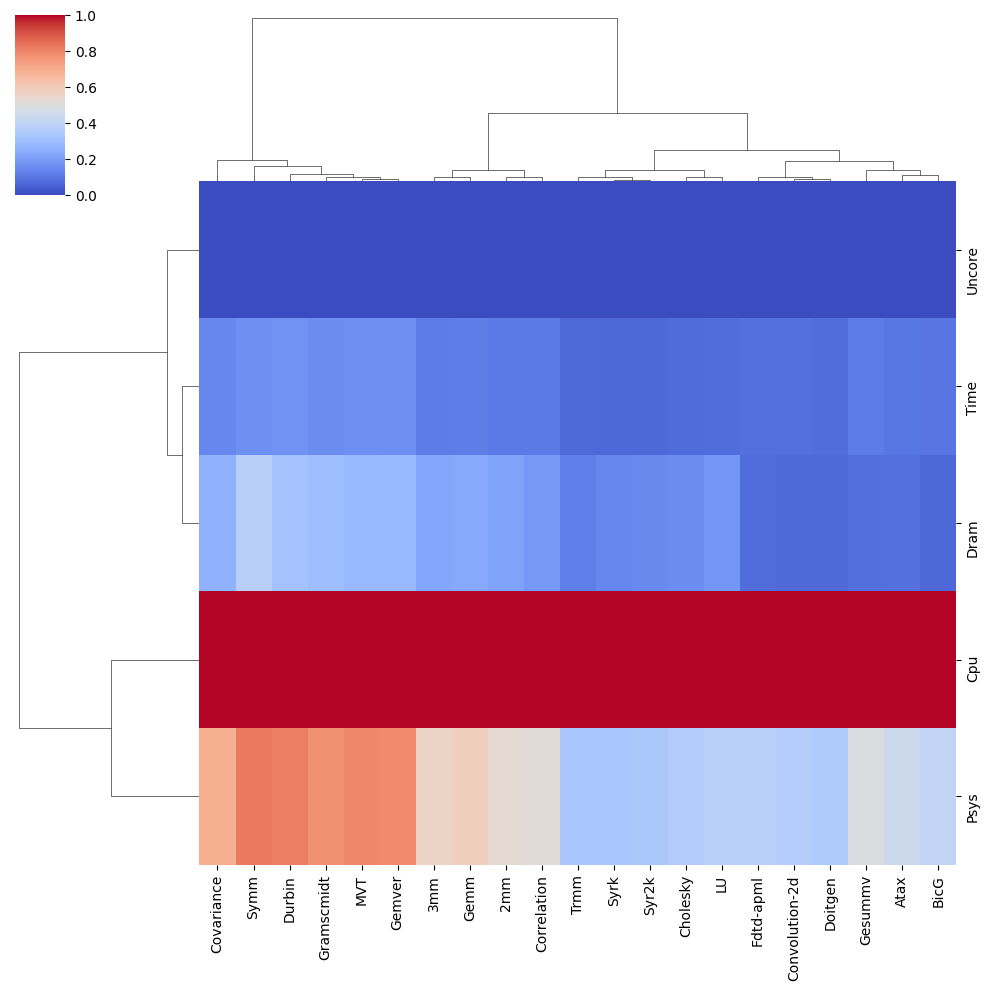

In [166]:
import pandas as pd
import seaborn as sn

# Suponha que df_resultados seja o DataFrame criado a partir do código anterior
# e que ele já está na forma correta, com benchmarks como índices e métricas como colunas

# Utiliza a função clustermap do Seaborn para criar o heatmap clusterizado
# Isso irá agrupar os dados tanto nas linhas quanto nas colunas e plotar os dendrogramas correspondentes
sn.clustermap(df_resultados, method='ward', cmap='coolwarm', standard_scale=1)

# Mostra o gráfico
plt.show()

<Axes: >

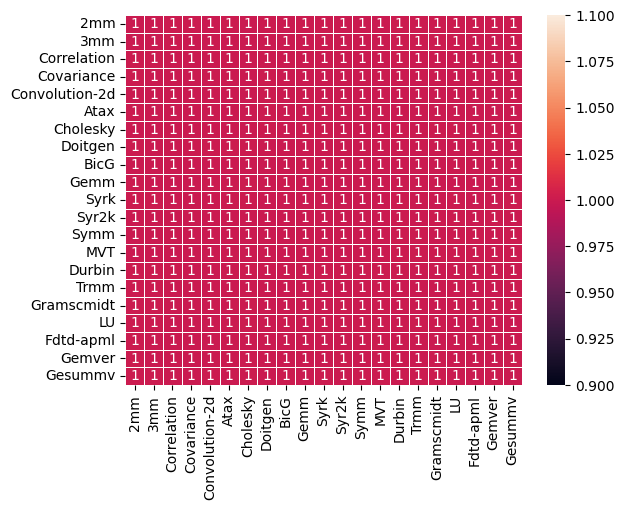

In [147]:
import pandas as pd
import seaborn as sn

correlation = df_resultados.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True,  linewidths=.6)
plot

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

mape = []
resultados = {}


# Iteração sobre os arquivos CSV
for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
    resultados[nome_benchmark] = []
    for percent in range(50, 91, 10):
       # Carregar o dataframe com os dados do benchmark
        df = pd.read_csv(caminho_csv, sep=';')
        df = microjoule_to_joule(df)
        df['ENERGY'] = df['CPU'] + df['DRAM'] 

        X_train = df[['INPUT']][:percent]
        y_train_ENERGY = df['ENERGY'][:percent]

        # O grau do polinômio
        grau = 3
        poly_features = PolynomialFeatures(degree=grau)
        X_train_poly = poly_features.fit_transform(X_train)

        regression_ENERGY = LinearRegression()
        regression_ENERGY.fit(X_train_poly, y_train_ENERGY)

        X_inputs = df[['INPUT']][-10:]
        X_inputs_poly = poly_features.transform(X_inputs)
        y_pred_ENERGY = regression_ENERGY.predict(X_inputs_poly)

        y_true = df['ENERGY'][-10:]
        
        mape = calculate_mape(y_true, y_pred_ENERGY)
        resultados[nome_benchmark].append(mape*100)
       ## print(f'MAPE ({nome_benchmark} => {percent}% => {grau}°): {mape*100:.1f}%')
df_resultados = pd.DataFrame(resultados, index=range(50, 91, 10))
df_resultados.head()

,2mm,3mm,Correlation,Covariance,Convolution-2d,Atax,Cholesky,Doitgen,BicG,Gemm,...,Syr2k,Symm,MVT,Durbin,Trmm,Gramscmidt,LU,Fdtd-apml,Gemver,Gesummv
50,2.856188,7.784348,20.165464,6.607723,52.273265,22.467816,14.845632,11534.269741,19.502324,4.737189,...,0.857988,18.365811,281.929459,12.288718,7.615901,5.692499,0.996835,5.078644,308.429523,39.017731
60,3.405356,5.349794,3.877693,4.583168,65.088286,57.684709,2.329179,19247.516819,15.517396,3.641752,...,2.200563,2.339045,269.216637,7.159359,7.305294,5.937311,1.217401,2.972655,265.051004,23.590658
70,2.795006,2.758689,4.540882,9.406627,100.904351,20.427997,1.719366,26441.911788,6.545579,3.419635,...,1.502768,4.281342,269.287085,3.349395,10.472859,19.177651,0.623869,2.545413,290.536350,20.608836
80,4.231393,3.855637,2.485811,4.850924,32.456357,3.911875,0.991928,19841.778777,1.883978,6.052090,...,0.954677,3.039419,304.801776,1.072602,3.821918,5.906020,0.482137,5.329593,283.395416,5.049427
90,3.642067,3.277232,2.206703,5.686990,43.547575,2.429315,1.171049,4595.853706,1.698222,5.198627,...,0.506615,2.733815,101.537617,1.059001,3.950979,6.240885,0.489825,2.403057,82.446141,3.792814


<Axes: >

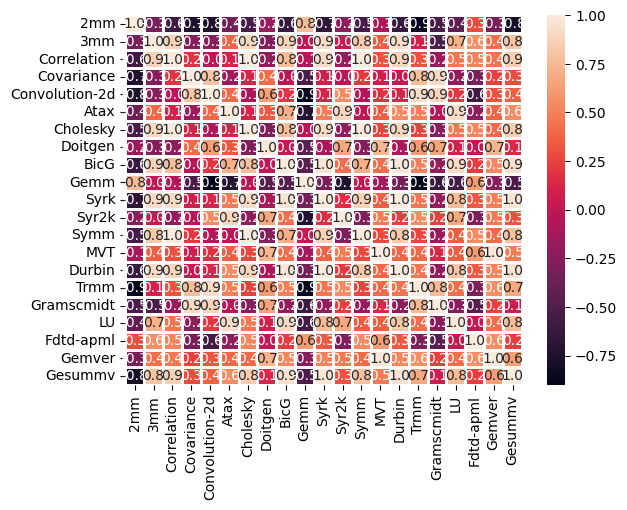

In [169]:
import pandas as pd
import seaborn as sn

correlation = df_resultados.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=1)
plot

In [92]:
import pandas as pd

# Suponha que queremos criar um DataFrame com 3 colunas e 5 linhas
data = {
    'Coluna1': [1, 2, 3, 4, 5],
    'Coluna2': ['A', 'B', 'C', 'D', 'E'],
    'Coluna3': [10.0, 20.0, 30.0, 40.0, 50.0]
}

# Criamos o DataFrame
df = pd.DataFrame(data)

# Definimos os nomes das colunas
df.columns = ['ID', 'Letra', 'Valor']

# Definimos os nomes dos índices
df.index = ['Linha1', 'Linha2', 'Linha3', 'Linha4', 'Linha5']

# Mostramos o DataFrame
print(df)

        ID Letra  Valor
Linha1   1     A   10.0
Linha2   2     B   20.0
Linha3   3     C   30.0
Linha4   4     D   40.0
Linha5   5     E   50.0


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

mape = []
resultados = {}

# Iteração sobre os arquivos CSV
for percent in range(50, 91, 10):
    resultados[percent] = []
    for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
        # Carregar o dataframe com os dados do benchmark
        df = pd.read_csv(caminho_csv, sep=';')
        df = microjoule_to_joule(df)
        df['ENERGY'] = df['CPU'] + df['DRAM'] 

        X_train = df[['INPUT']][:percent]
        y_train_ENERGY = df['ENERGY'][:percent]

        # O grau do polinômio
        grau = 3
        poly_features = PolynomialFeatures(degree=grau)
        X_train_poly = poly_features.fit_transform(X_train)

        regression_ENERGY = LinearRegression()
        regression_ENERGY.fit(X_train_poly, y_train_ENERGY)

        X_inputs = df[['INPUT']][-10:]
        X_inputs_poly = poly_features.transform(X_inputs)
        y_pred_ENERGY = regression_ENERGY.predict(X_inputs_poly)

        y_true = df['ENERGY'][-10:]

        mape = calculate_mape(y_true, y_pred_ENERGY)
        resultados[percent].append(mape*100)
        ##print(f'MAPE ({nome_benchmark} => {percent}% => {grau}°): {mape*100:.1f}%')
df_resultados = pd.DataFrame(resultados, index=(nomes_benchmarks))
df_resultados.head(21)

,50,60,70,80,90
2mm,2.856188,3.405356,2.795006,4.231393,3.642067
3mm,7.784348,5.349794,2.758689,3.855637,3.277232
Correlation,20.165464,3.877693,4.540882,2.485811,2.206703
Covariance,6.607723,4.583168,9.406627,4.850924,5.686990
Convolution-2d,52.273265,65.088286,100.904351,32.456357,43.547575
Atax,22.467816,57.684709,20.427997,3.911875,2.429315
Cholesky,14.845632,2.329179,1.719366,0.991928,1.171049
Doitgen,11534.269741,19247.516819,26441.911788,19841.778777,4595.853706
BicG,19.502324,15.517396,6.545579,1.883978,1.698222
Gemm,4.737189,3.641752,3.419635,6.052090,5.198627


<Axes: >

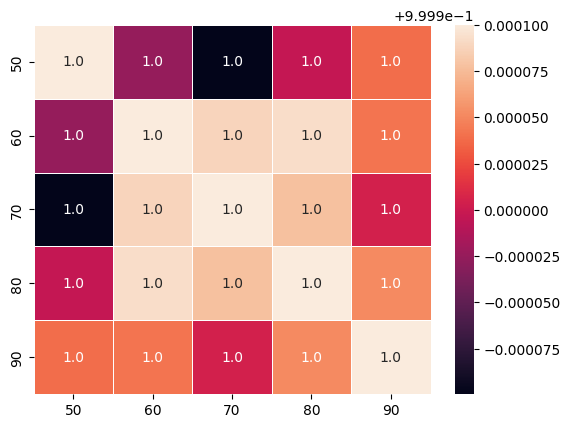

In [115]:
import pandas as pd
import seaborn as sn

correlation = df_resultados.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

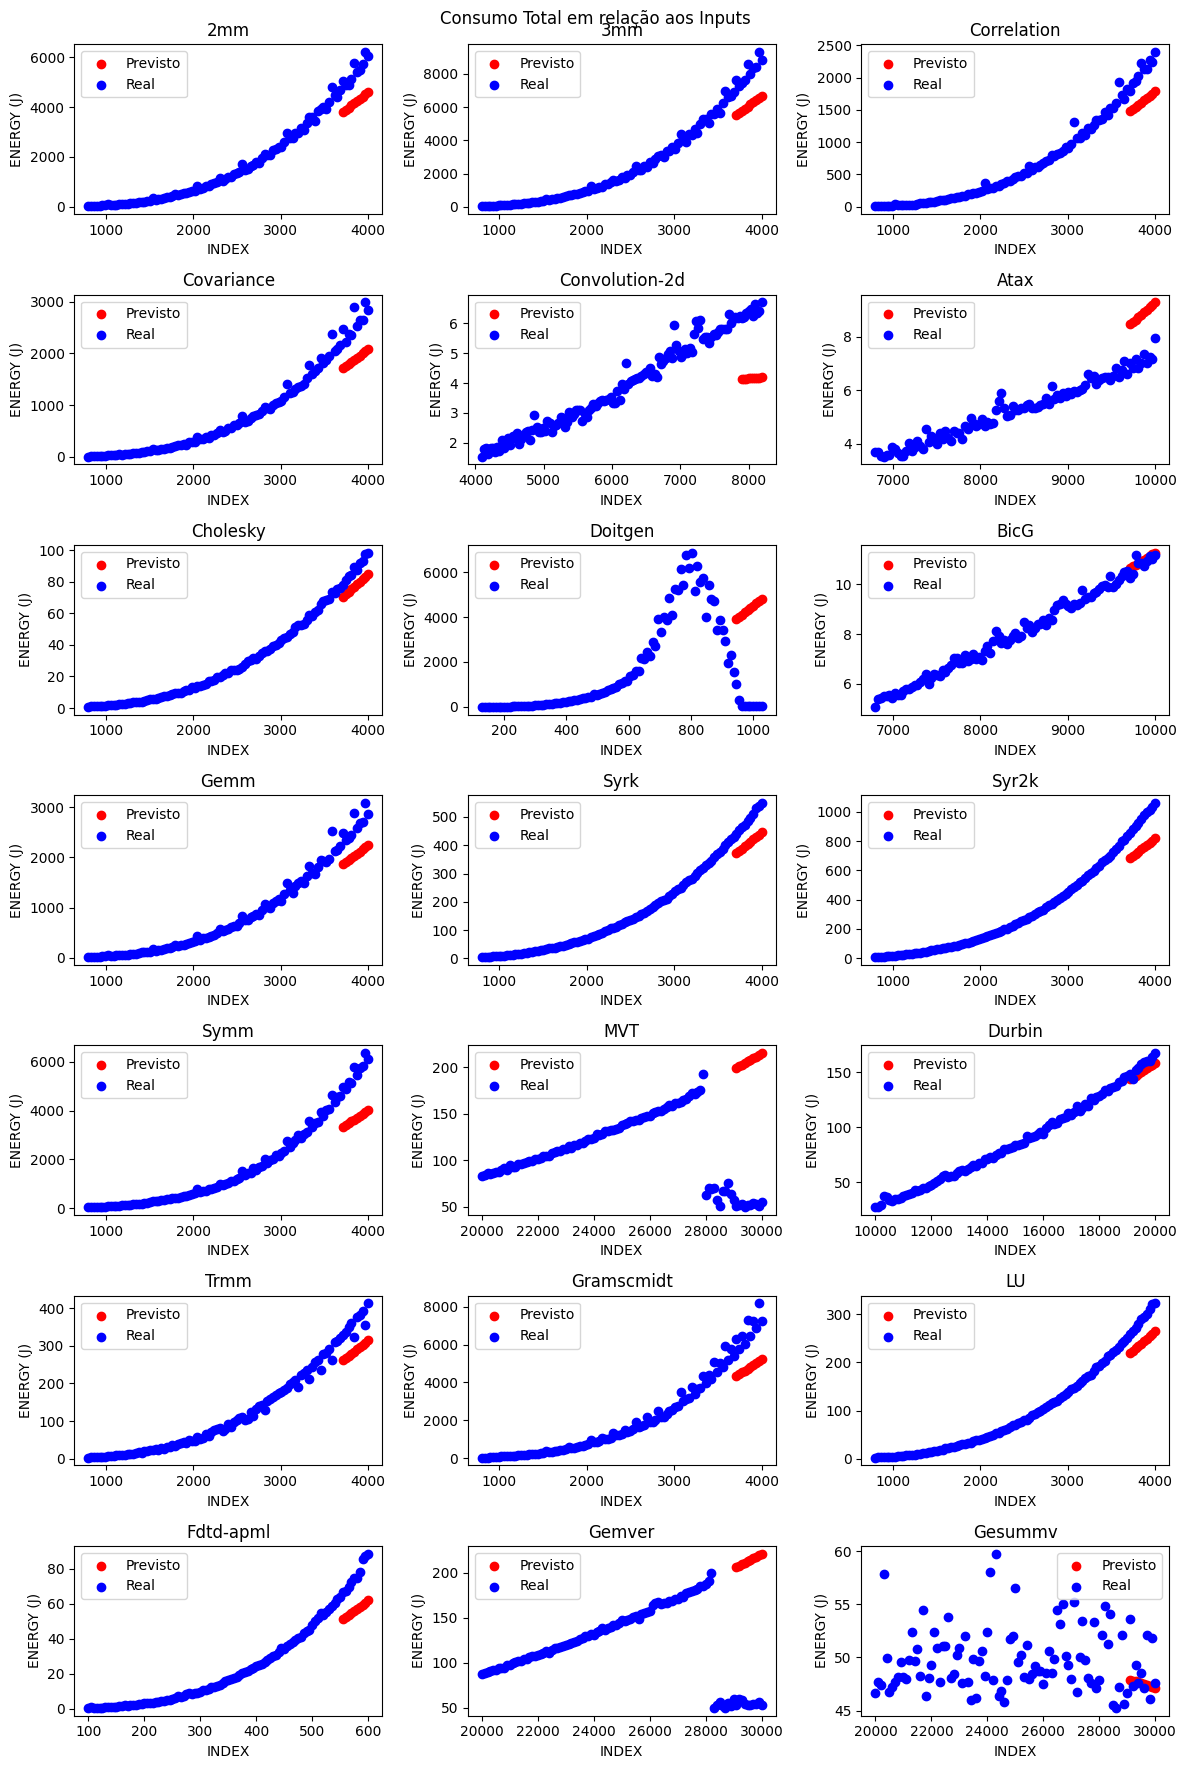

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Criação da figura e dos subplots
fig, axs = plt.subplots(7, 3, figsize=(12, 18))
fig.suptitle('Consumo Total em relação aos Inputs')

# Iteração sobre os arquivos CSV
for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
    # Carregar o dataframe com os dados do benchmark
    df = pd.read_csv(caminho_csv, sep=';')
    df = microjoule_to_joule(df)
    df['ENERGY'] = df['CPU'] + df['DRAM'] 
    
    X_train = df[['INPUT']][:50]
    y_train_ENERGY = df['ENERGY'][:50]

    #o grau do polinômio
    grau = 2
    poly_features = PolynomialFeatures(degree=grau)
    X_train_poly = poly_features.fit_transform(X_train)

    regression_ENERGY = LinearRegression()
    regression_ENERGY.fit(X_train_poly, y_train_ENERGY)

    X_inputs = df[['INPUT']][-10:]
    X_inputs_poly = poly_features.transform(X_inputs)
    y_pred_ENERGY = regression_ENERGY.predict(X_inputs_poly)

    # Definir as posições dos subplots
    row = i // 3
    col = i % 3

    # Plotar o gráfico de previsão do consumo de energia
    axs[row, col].scatter(X_inputs['INPUT'], y_pred_ENERGY, color='red', label='Previsto')
    axs[row, col].scatter(df['INPUT'], df['ENERGY'], color='blue', label='Real')
    axs[row, col].set_title(nome_benchmark)
    axs[row, col].set_xlabel('INDEX')
    axs[row, col].set_ylabel('ENERGY (J)')
    axs[row, col].legend()

plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Exibir a figura
plt.tight_layout()
plt.show()

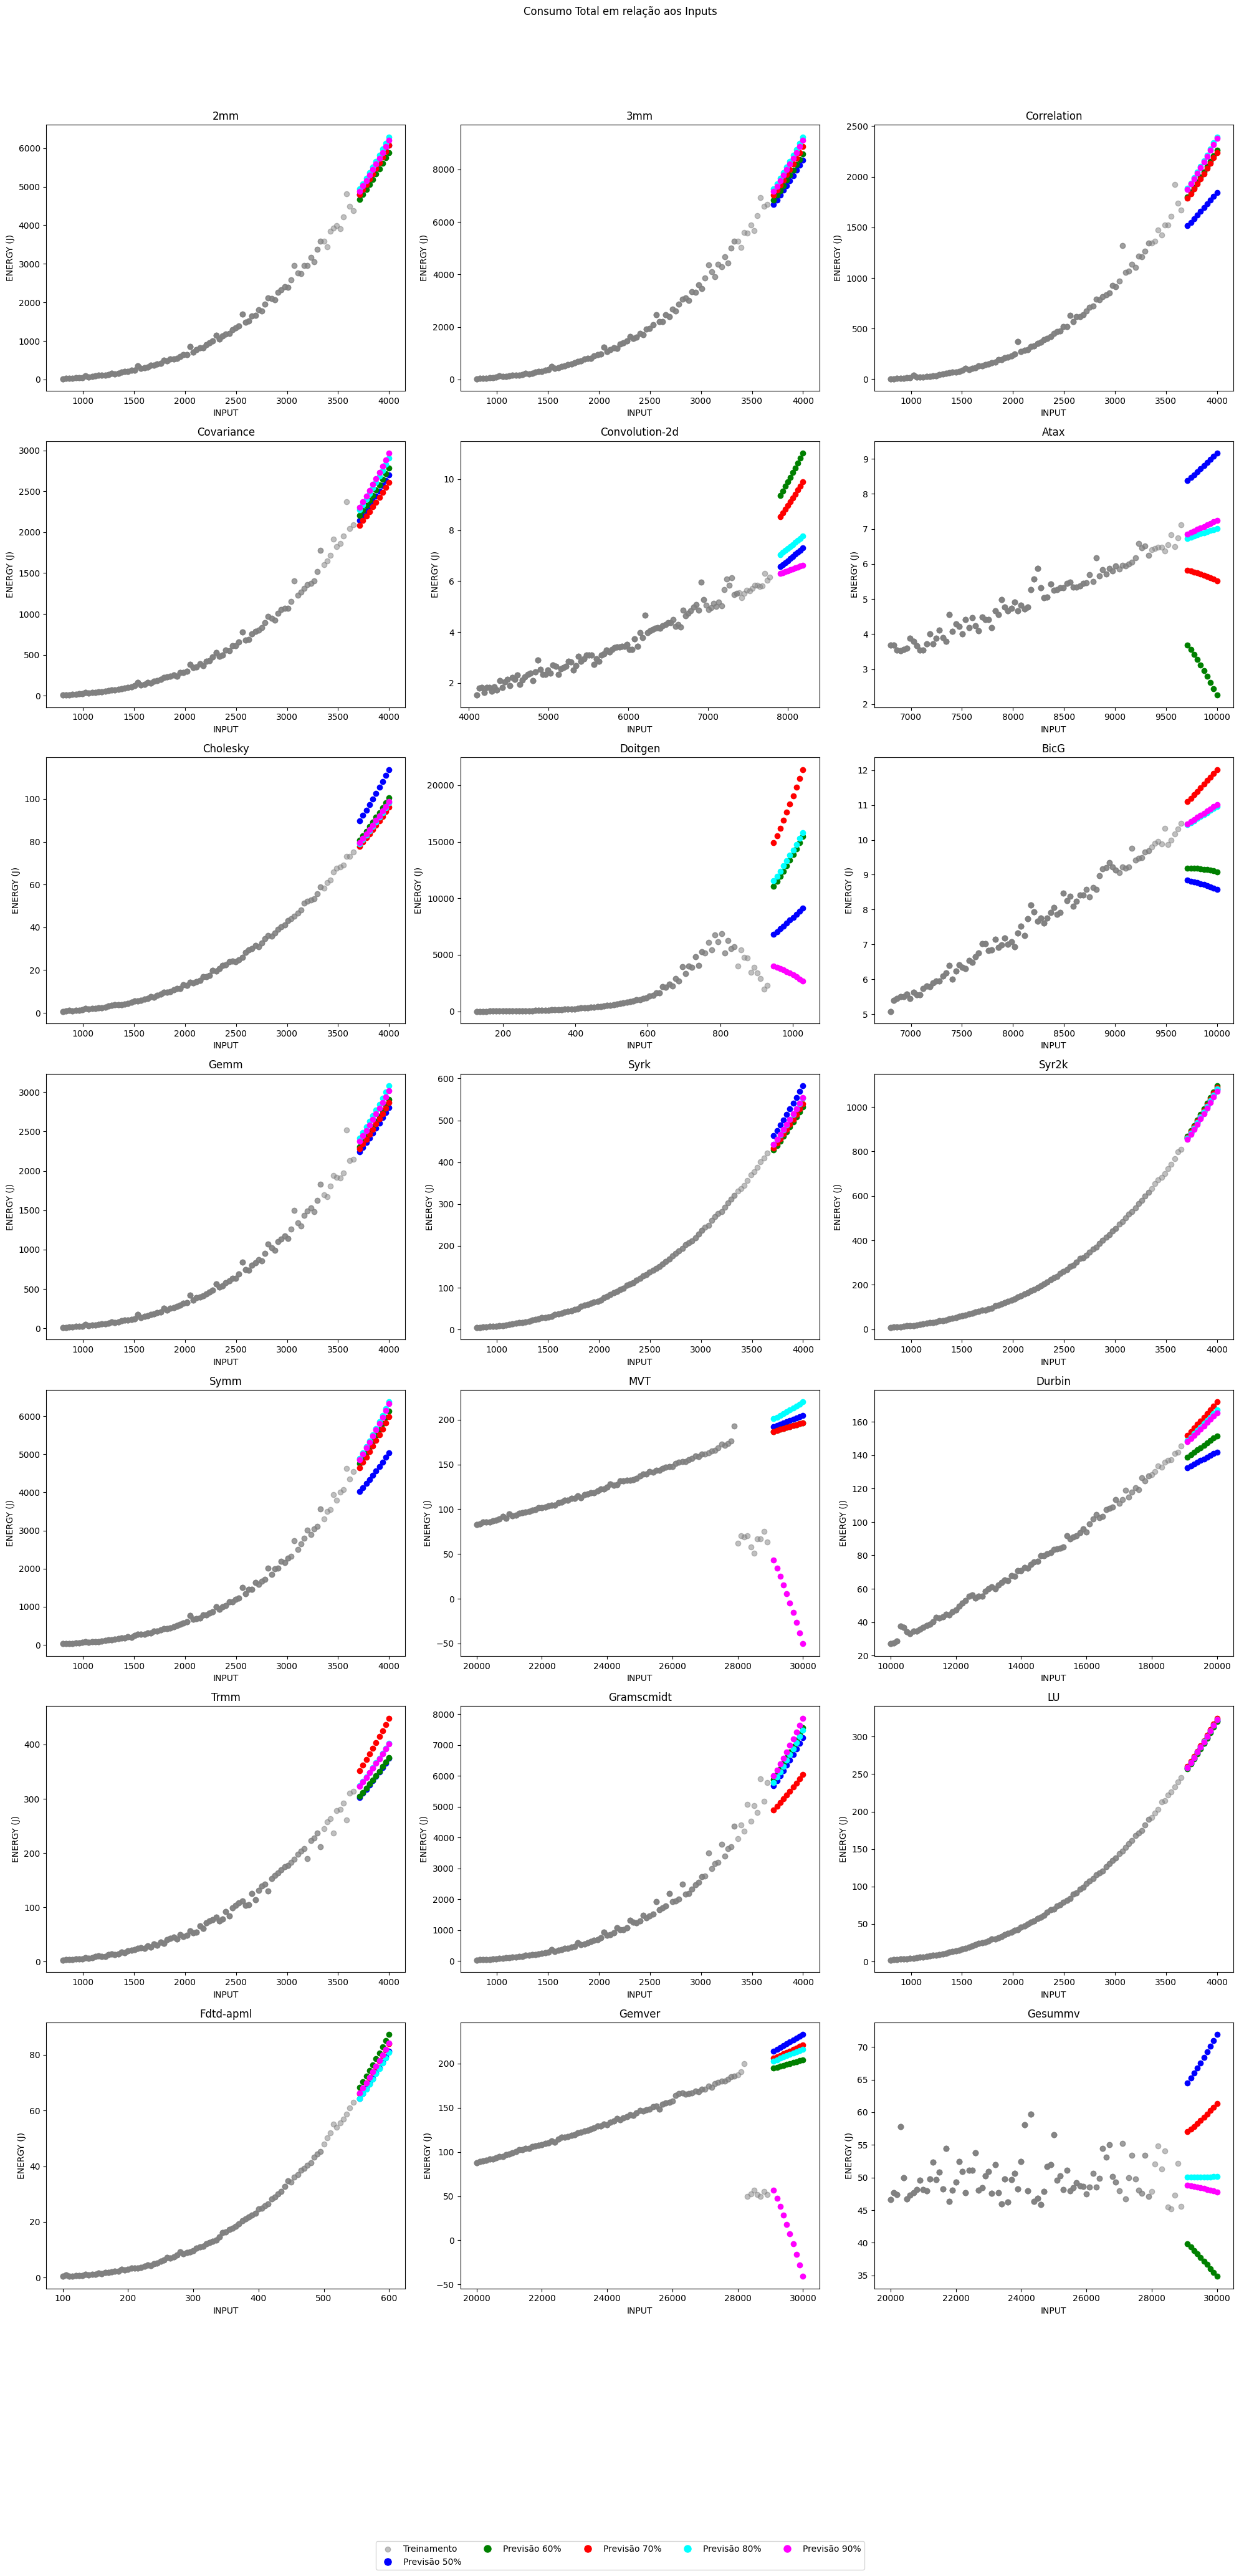

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuma que você tem uma função para converter microjoules para joules
# def microjoule_to_joule(df):
#     # ... sua implementação ...
#     return df

# Definindo as cores para cada porcentagem
cores_por_porcentagem = {
    50: 'blue',
    60: 'green',
    70: 'red',
    80: 'cyan',
    90: 'magenta'
}

# Criação da figura e dos subplots com tamanho aumentado para melhor legibilidade
fig, axs = plt.subplots(7, 3, figsize=(20, 40))  # Aumentando o tamanho da figura
fig.suptitle('Consumo Total em relação aos Inputs')

# Preparando as legendas para o treinamento e as previsões
handles = []
labels = []

# Iteração sobre as porcentagens de treinamento
for porcentagem in range(50, 91, 10):
    # Assumindo que caminhos_csv e nomes_benchmarks são listas fornecidas por você
    for i, (caminho_csv, nome_benchmark) in enumerate(zip(caminhos_csv, nomes_benchmarks)):
        # Carregar o dataframe com os dados do benchmark
        df = pd.read_csv(caminho_csv, sep=';')
        df = microjoule_to_joule(df)
        df['ENERGY'] = df['CPU'] + df['DRAM']

        # Dividir os dados de treinamento e teste
        n_train = int(len(df) * porcentagem / 100)
        X_train = df[['INPUT']][:n_train]
        y_train_ENERGY = df['ENERGY'][:n_train]

        # Treinar o modelo de regressão
        grau = 3
        poly_features = PolynomialFeatures(degree=grau)
        X_train_poly = poly_features.fit_transform(X_train)
        model = LinearRegression()
        model.fit(X_train_poly, y_train_ENERGY)

        # Prever os valores de energia
        X_test = df[['INPUT']][-10:]
        X_test_poly = poly_features.transform(X_test)
        y_pred = model.predict(X_test_poly)

        # Definir as posições dos subplots
        row = i // 3
        col = i % 3

        # Plotar os resultados reais e previstos
        cor_atual = cores_por_porcentagem[porcentagem]
        axs[row, col].scatter(X_train['INPUT'], y_train_ENERGY, color='grey', alpha=0.5)  # Apenas uma vez por imagem
        axs[row, col].scatter(X_test['INPUT'], y_pred, color=cor_atual, label=f'Previsão {porcentagem}%')
        axs[row, col].set_title(nome_benchmark)
        axs[row, col].set_xlabel('INPUT')
        axs[row, col].set_ylabel('ENERGY (J)')

        # Adicionar a legenda apenas uma vez
        if porcentagem == 50 and i == 0:
            handles.append(axs[row, col].scatter([], [], color='grey', alpha=0.5))
            labels.append('Treinamento')

# Adicionando legendas das previsões
for porcentagem, cor in cores_por_porcentagem.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Previsão {porcentagem}%',
                              markersize=10, markerfacecolor=cor))
    labels.append(f'Previsão {porcentagem}%')

# Ajustar os subplots e mostrar o gráfico
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()